In [93]:
import sys
sys.path.insert(0, "/home/martin/anaconda2/lib/python2.7/site-packages")

import vaex
import pyfits
from matplotlib import pyplot as plt
from astropy.table import join, Table
import ipywidgets as widgets
import numpy as np

%matplotlib inline

import pandas as pd
import multiprocessing

In [86]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# dat = vaex.open("RAVE_TGAS.fits")
# dat1 = Table.read("RAVE_DR5.fits")
# dat2 = Table.read("RAVE_TGAS.fits")

In [3]:
dat = vaex.open("RAVE_merged.fits")

In [5]:
# df1 = dat.to_astropy_table()
# df2 = dat2.to_astropy_table()
# print dat.all_column_names
#df = join(dat1, dat2, keys='RAVE_OBS_ID', join_type='inner')

In [65]:
df = {"alpha" : dat["Alpha_c"].columns["Alpha_c"].tolist(),
     "parallax" : dat["parallax_2"].columns["parallax_2"].tolist(),
     "l" : dat["l"].columns["l"].tolist(),
     "b" : dat["b"].columns["b"].tolist(),
      "pmra" : dat["pmra"].columns["pmra"].tolist(),
      "pmdec" : dat["pmdec"].columns["pmdec"].tolist(),
     "temp" : dat["Teff_IR"].columns["Teff_IR"].tolist()}
df = pd.DataFrame(df)


In [76]:
5 < None

False

In [99]:
size_groups = [((None, 0.2) ,10), ((0.2, 0.4),20), ((0.6, None),30)]
color_groups = [((None, 4000), "r"),
                ((4000, 5500), "g"),
               ((5500, 7000), "b"),
               ((7000, None), "y"),]

@widgets.interact(dist=(0.01,15,0.01), width=(0.005,1,0.001), l=(0,360,20), window_l = (10,360,10))
def slide_thru(dist=0.1, width=0.005, l=200, window_l = 140):
    
    window_b = 180
    
    parall = 1. / dist 
    # parall_rad = 1./ width / 2.    
    parall_rad =  width
    rdf = df[df["parallax"] > parall - parall_rad]
    rdf = rdf[rdf["parallax"] < parall + parall_rad]
    rdf = rdf[rdf["l"] < l + window_l / 2.]
    rdf = rdf[rdf["l"] >= l - window_l / 2.]
       
    plt.figure(figsize=(8,6))  
    
    for gr, size in size_groups:
        if gr[0]:
            rdf1 = rdf[rdf["alpha"] > gr[0]]
        else:
            rdf1 = rdf
        
        if gr[1]:
            rdf2 = rdf1[rdf1["alpha"] < gr[1]]
            
        colors = []
        for i, temp in enumerate(rdf2["temp"]):
            for gr, col in color_groups:
                if gr[0]:
                    cond1 = temp > gr[0]
                else:
                    cond1 = True

                if gr[1]:
                    cond2 = temp <=gr[1]
                else:
                    cond2 = True

                if cond1 and cond2:
                    colors.append(col)
                    break     
        

        plt.quiver(rdf2["l"], rdf2["b"], rdf2["pmra"] / 5., rdf2["pmdec"] / 5. , width=0.008)
        plt.scatter(rdf2["l"], rdf2["b"], s=size, color=colors, label=str(gr))
          
    plt.legend()
    plt.show()

In [47]:
@widgets.interact(dist=(0.1,15,0.1), width=(0.01,1,0.01), l=(0,360,20), window_l = (10,360,10))
def slide_thru2(dist=0.1, width=0.01, l=200, window_l = 140):
    
    window_b = 180
    
    parall = 1. / dist 
    # parall_rad = 1./ width / 2.    
    parall_rad =  width
    
    print parall_rad, parall
    print parall - parall_rad, parall + parall_rad
    
    dat.select("parallax_2 > {0}".format(parall - parall_rad))
    dat.select("parallax_2 < {0}".format(parall + parall_rad), mode="and")
    
    dat.select("l > {0}".format(l - window_l / 2.), mode="and")
    dat.select("l < {0}".format(l + window_l / 2.), mode="and")
    
    # dat.select("b > {0}".format(b - window_b / 2.), mode="and")
    # dat.select("b < {0}".format(b + window_b / 2.), mode="and")
    dat.scatter("l", "b",  selection=True, s_expr="Alpha_c*40", c_expr="Teff_IR", length_check=False)
    # dat.scatter("l", "b",  selection=True, s_expr="sqrt(pmra**2+pmdec**2)", c_expr="Teff_IR", length_check=False)
    # plt.title("Actual distance range {0} kpc - {1} kpc".format())
    
    plt.show()

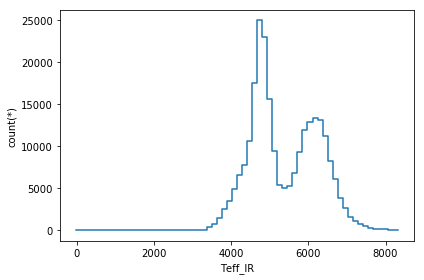

In [72]:
dat.plot1d("Teff_IR")